# Census Income
### Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
# IMPORTING LIBRARIES
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
df.shape

(32560, 15)

## Observation :
1. In this dataset we have 32,560 records and 15 features.
2. Income is the target variable.

In [5]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

This is a classification problem.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Observation :
    Here we have age , fnlwgt, Education_num, capital_gain, capital_loss,  Hours_per__Week are numerical features and the rest is object data types.
    

In [7]:
# Let's check the null values and duplicate entries
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
df=df.replace(' ?',np.NaN)

In [10]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [11]:
# checking for other whitespace characters
df.isin([' ','NA','-']).sum().any()

False

In [12]:
df.drop_duplicates(keep='last', inplace=True)

In [13]:
df.shape

(32536, 15)

### Missing values

<AxesSubplot:>

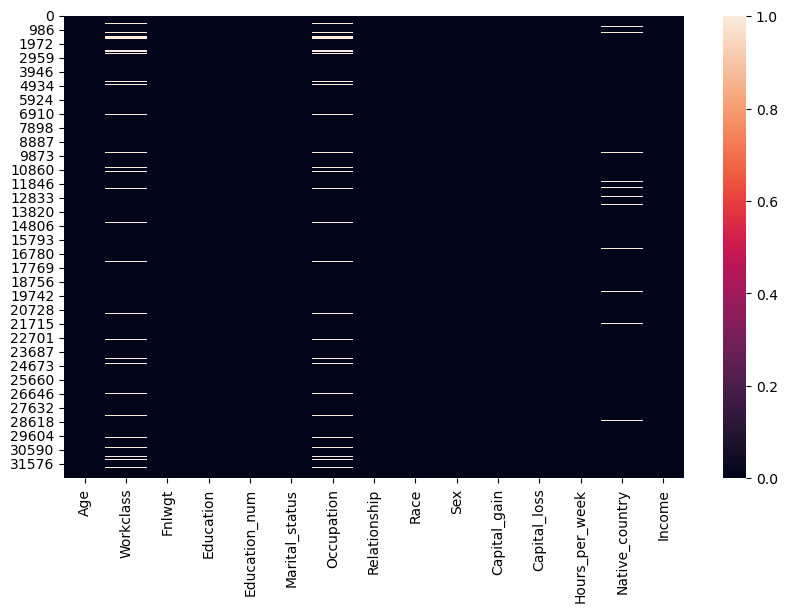

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

### Observationn:
There are missing values in Occupation,workclass, Native country.

In [17]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values],axis = 1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


### Observation :
1. In this dataset we have 32536 rows and 15 columns.
2. Income is the target variable.


In [19]:
# Now let's seperate the numerical and categorical features
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [20]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [21]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Observation:
* No Missing value is present

## Statistical summary

In [22]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Observation :
1. The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 38.

2. The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.

3. While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.

4. The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [23]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

## EDA

In [35]:
city_values = df.Income.value_counts().values
city_labels = df.Income.value_counts().index

Text(0.5, 1.0, 'Population Distributation')

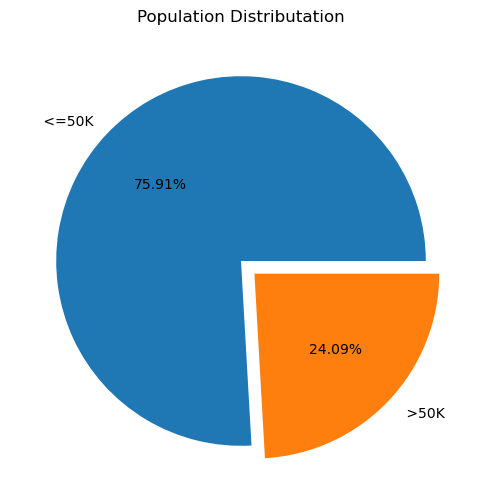

In [47]:
plt.figure(figsize =(6,6))
plt.pie(city_values,labels = city_labels, autopct = '%1.2f%%',explode=[0,0.1])
plt.title('Population Distributation')

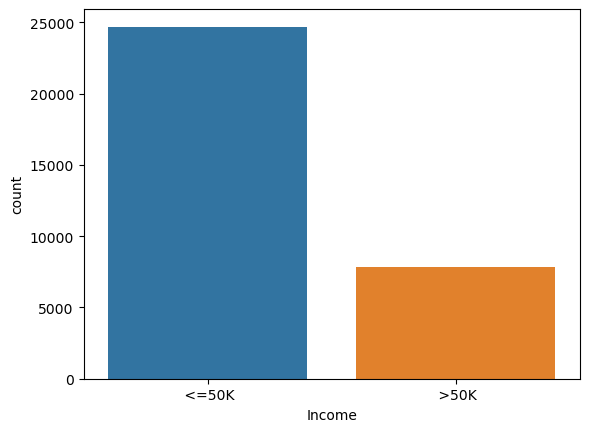

In [48]:
sns.countplot('Income',data = df)
plt.show()

### Observation :
1. 75.9 % population (24697 peoples) have income less than 50K.
2. Our task is to predict income and we see that target variable income is imbalanced.

In [50]:
df.head(1)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [52]:
print("Manimum Age:",df['Age'].min())
print('Maximum Age:',df['Age'].max())
print('Average Age:',df['Age'].mean())

Manimum Age: 17
Maximum Age: 90
Average Age: 38.58553602163757


In [53]:
# Defining function to create new columns to classify people according different age gruop
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'

In [54]:
# Calling function age_group
df['age_group']=df['Age'].apply(age_group)

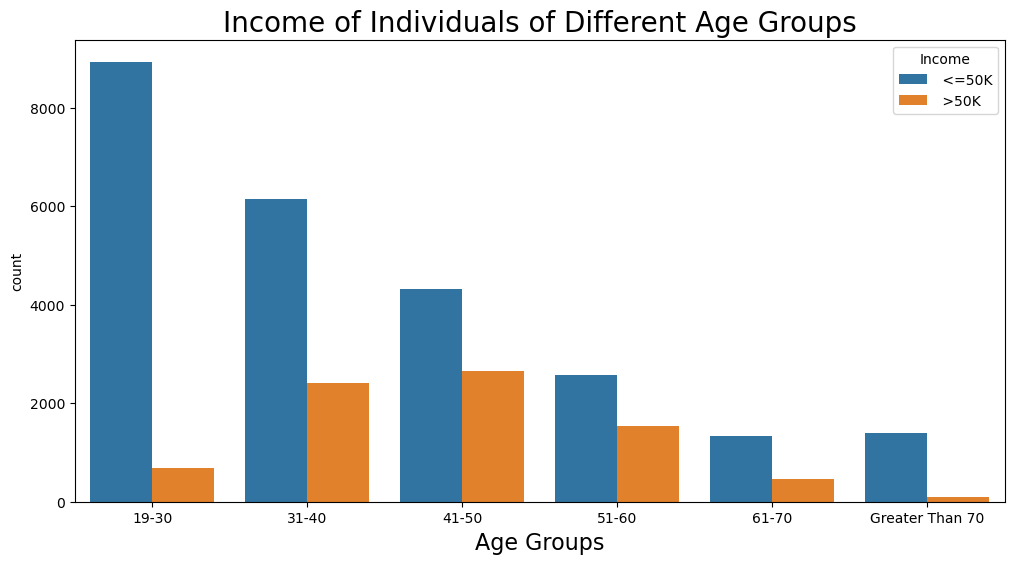

In [58]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
p = sns.countplot(df['age_group'], hue=df['Income'], order=order_list)
plt.title('Income of Individuals of Different Age Groups',fontsize =20)
p.set_xlabel('Age Groups',fontsize =16)
plt.show()

### Observation:
Here comes an interesting observation. We already know that only 24% people earnings more than 50K dollors and this plot tell us which age group then belong.

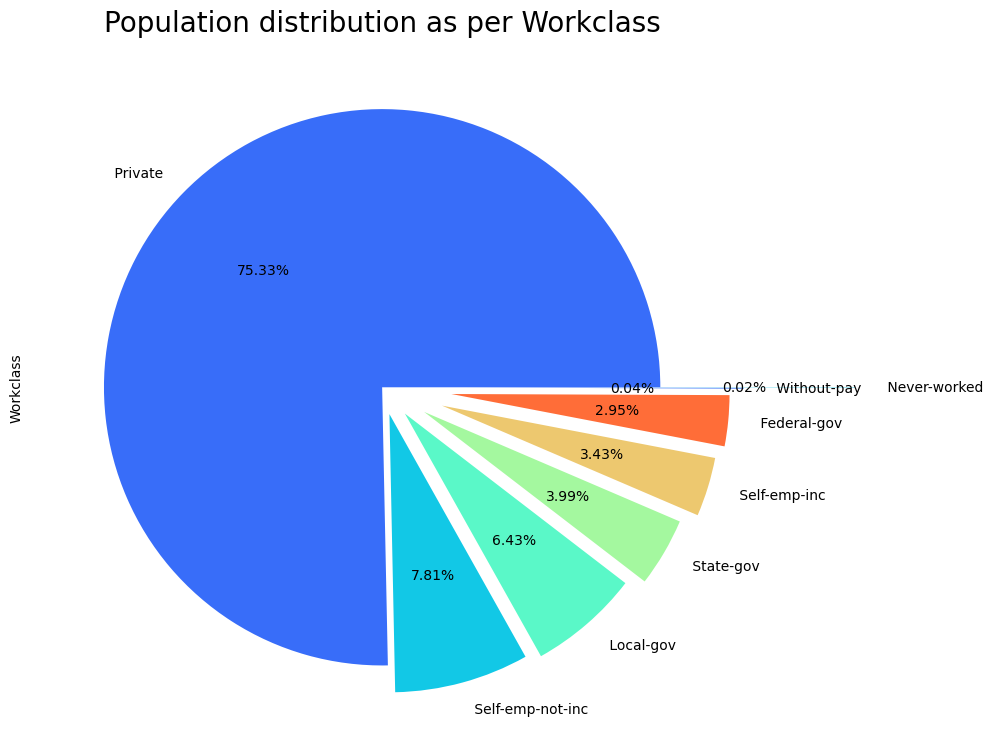

In [60]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%1.2f%%')
plt.title('Population distribution as per Workclass', fontsize=20)
plt.tight_layout()
plt.show()

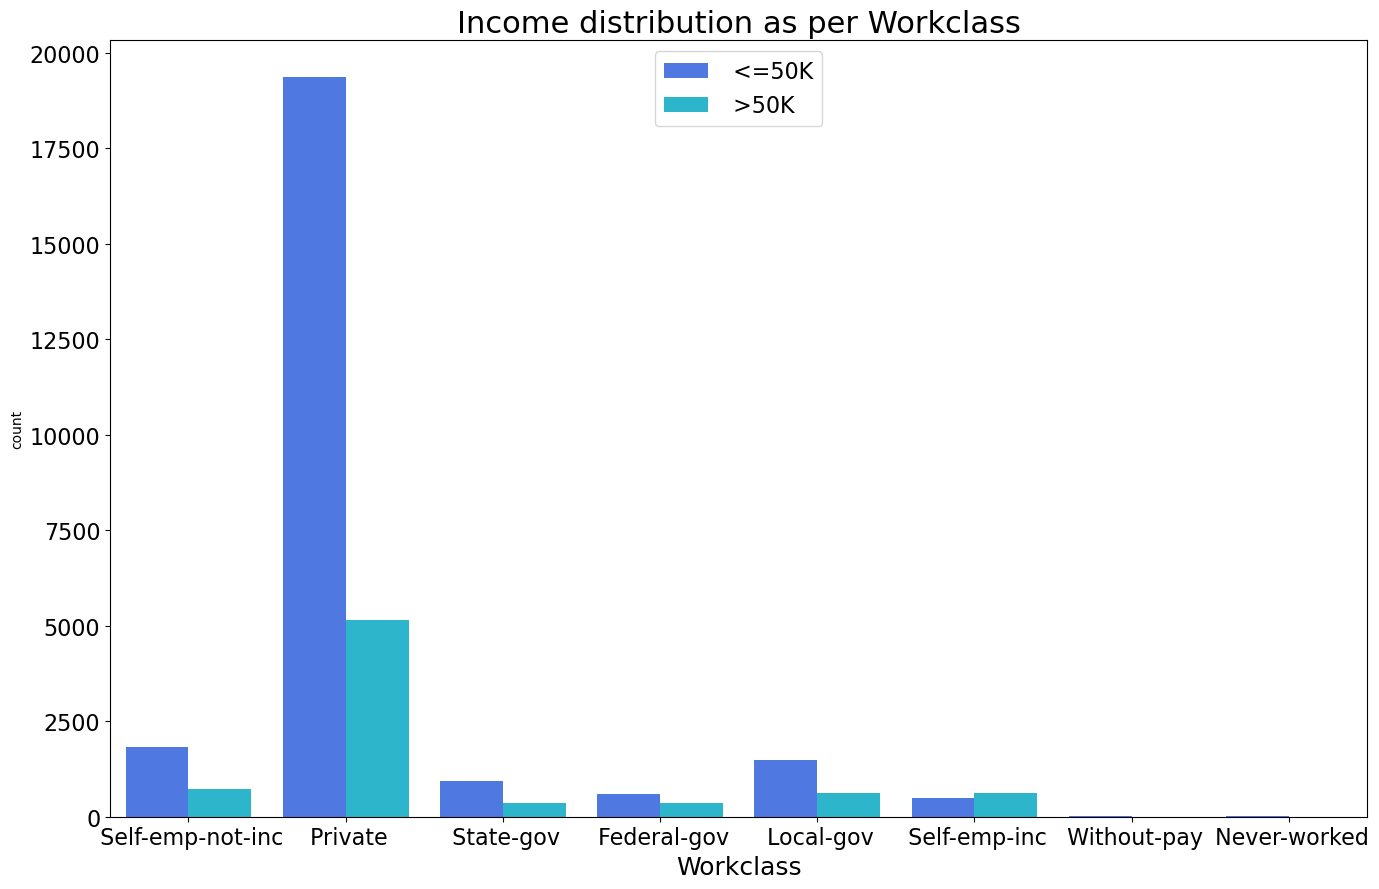

In [61]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Workclass'], hue=df['Income'])
plt.title('Income distribution as per Workclass', fontsize=22)
p.set_xlabel('Workclass',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [62]:
pd.crosstab(df['Income'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


### Observation :
1. 75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %
2. There is significant difference between private sector employees income where less than 25 % people earn more than 50K dollars an year.

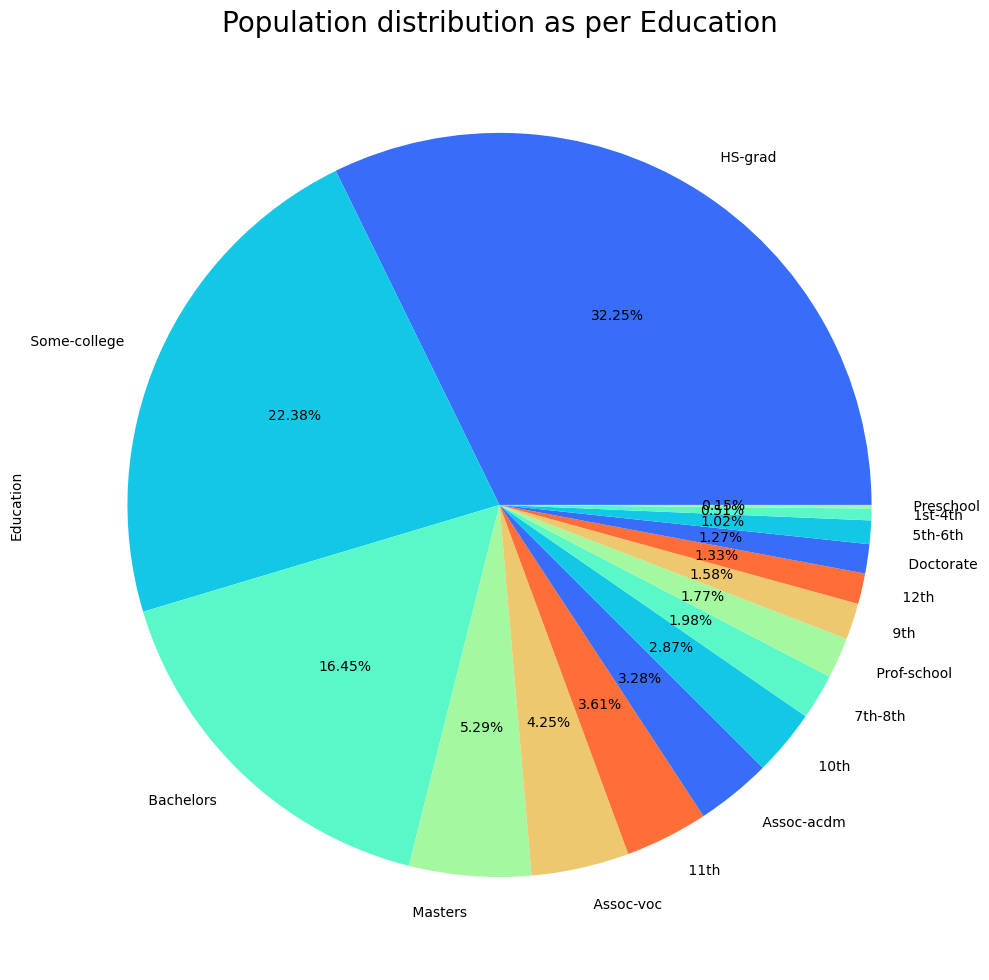

In [63]:
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Population distribution as per Education', fontsize=20)
plt.tight_layout()
plt.show()

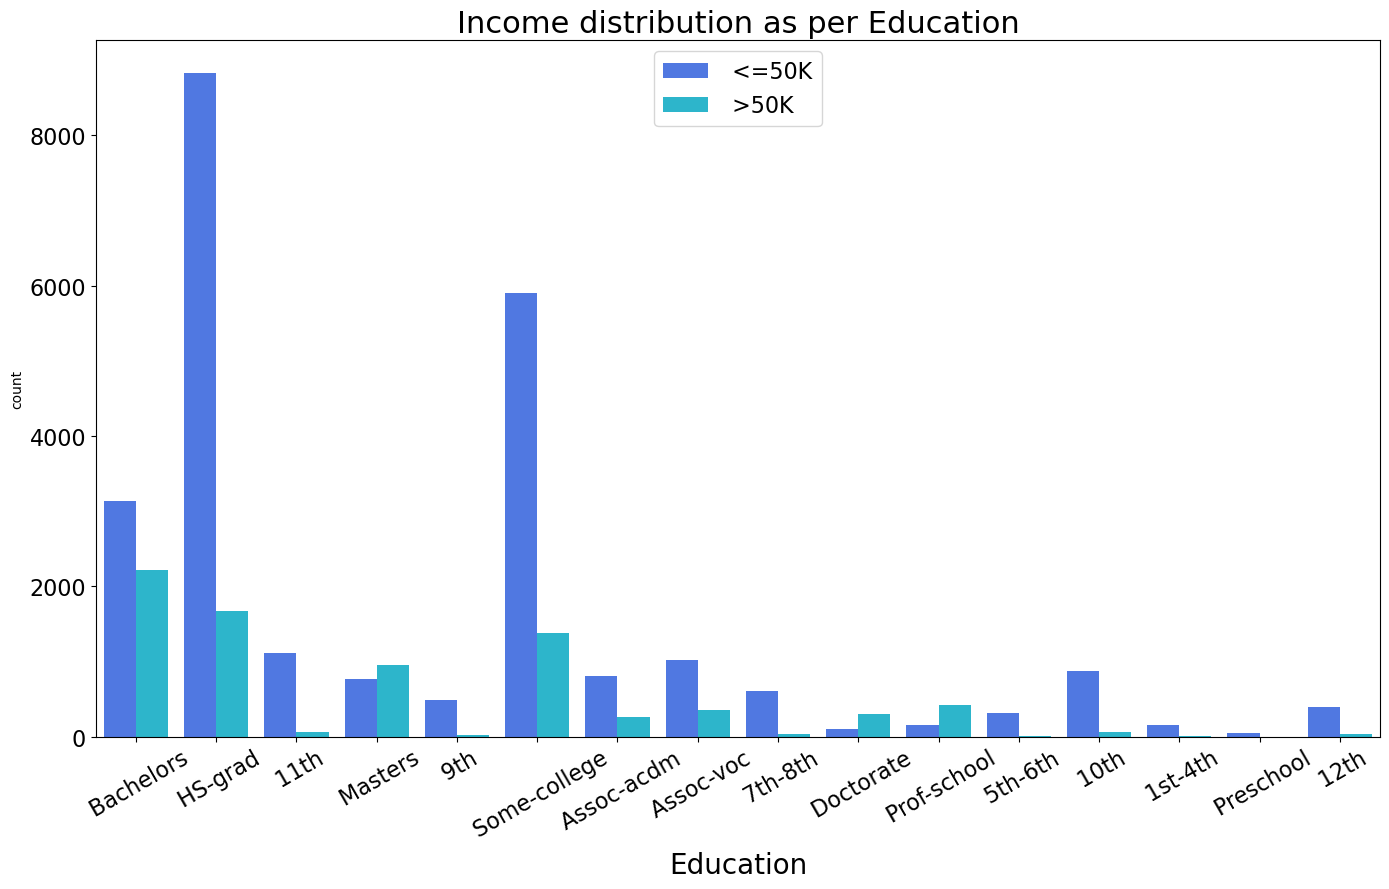

In [66]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Education'], hue=df['Income'])
plt.title('Income distribution as per Education', fontsize=22)
p.set_xlabel('Education',fontsize=20)
plt.xticks(fontsize=16,rotation = 30)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

### Observation:
1. Out of all population 32.3% people with HS-Grad education which is most prevalent education level.
2. 5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.
3. There are very handful people who earn more than 50 K dollars having education below 12th level.
4. Maximum number of people who earn more than 50K dollars are Bachelors degree holde

In [71]:
pd.crosstab(df['Education'],df["Workclass"], margins=True).style.background_gradient(cmap='RdPu')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


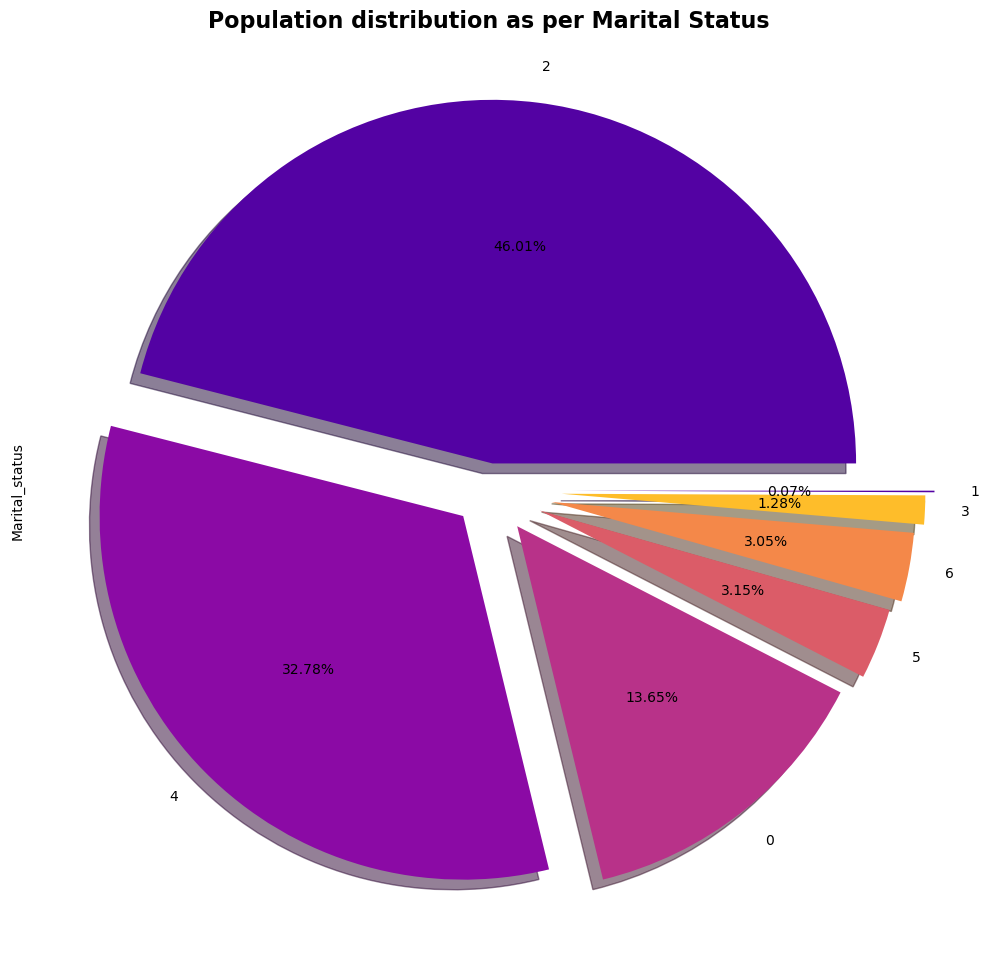

In [164]:
# impact of marital status on income
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],shadow=True)
plt.title('Population distribution as per Marital Status', fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [77]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True).style.background_gradient(cmap='BuGn')


Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


### Observation :
Married people are most like to earn more than 50K dollars an year.

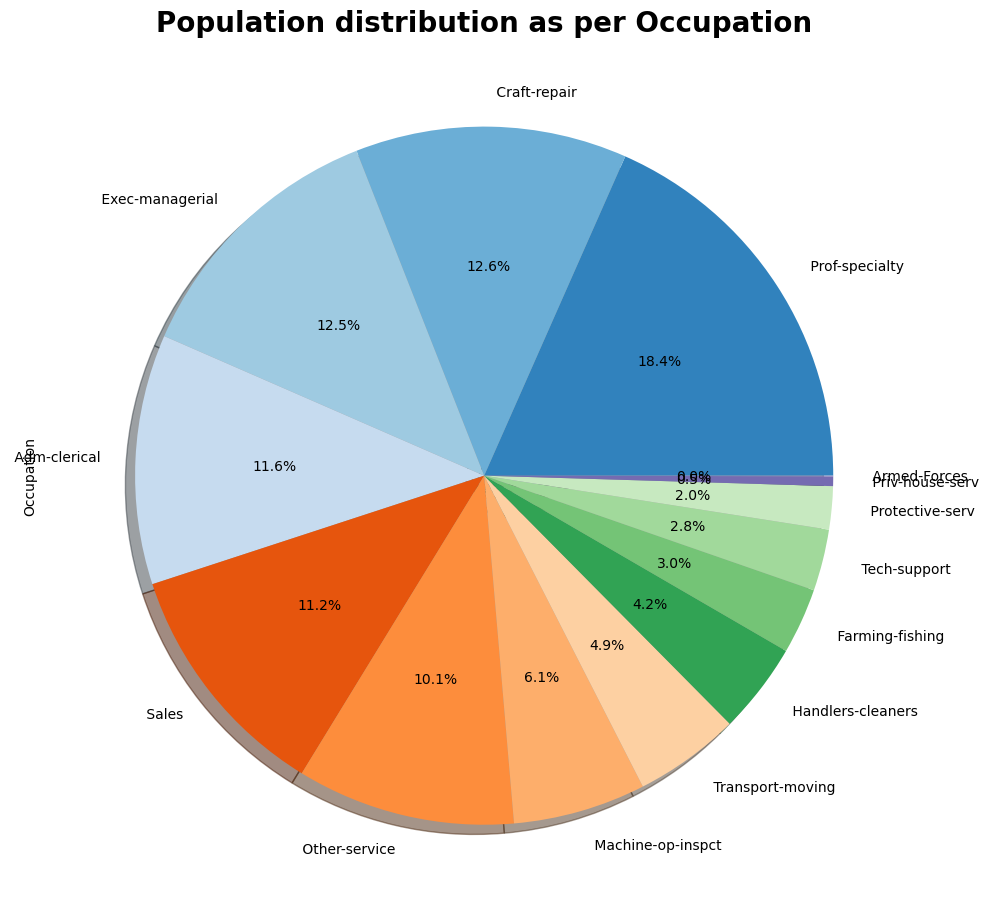

In [78]:
sns.set_palette('tab20c')
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%',shadow=True)
plt.title('Population distribution as per Occupation', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

In [79]:
pd.crosstab(df['Occupation'],df["Income"], margins=True).style.background_gradient(cmap='winter_r')


Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


### Observation:
1. Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.
2. If we talk in term of percentage probablity Exective Managerial position have 50% chances to lead in Greater than 50K dollars Club.
3. There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.

In [80]:
pd.crosstab(df['Occupation'],df["Workclass"], margins=True).style.background_gradient(cmap='magma')


Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


### Observation :
Here is another surprising element, there are 7 peoples From Never Worked Category with High earning Profession of Prof-speciality. Same from Without pay workclass we find 6 peoples with Exec-Managerial. Possibly they are working with unpaid internship profile.

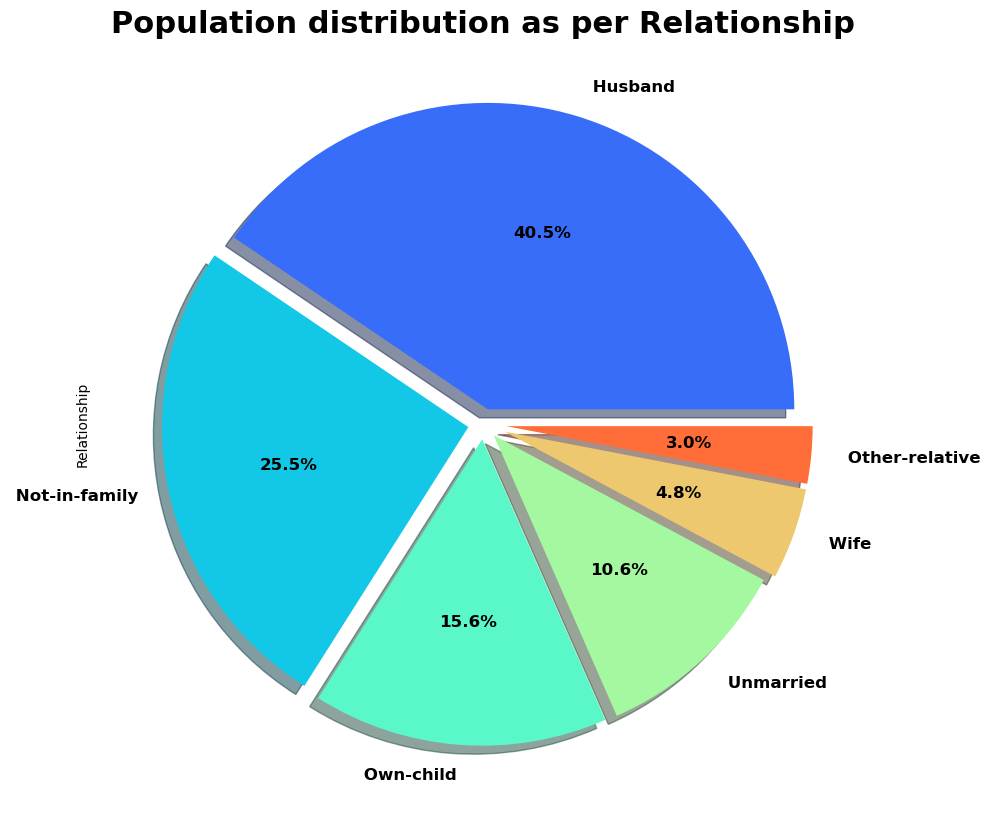

In [82]:
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],textprops={'fontweight' :'bold', 'fontsize':12}, shadow=True)
plt.title('Population distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

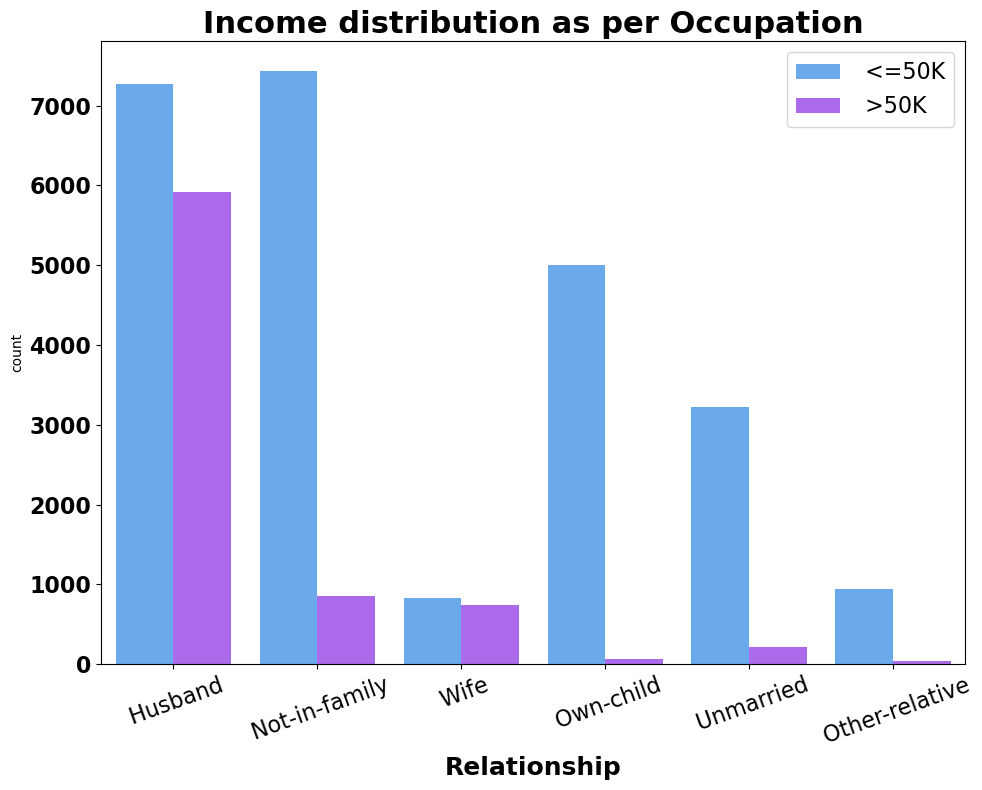

In [83]:
plt.figure(figsize=(10,8))
p = sns.countplot(df['Relationship'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

### Observation:
1. Wives are equally likely to earn more than 50K dollars an year.
2. For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
3. There are just a handful of Unmarried people earning more than 50K dollars an year.

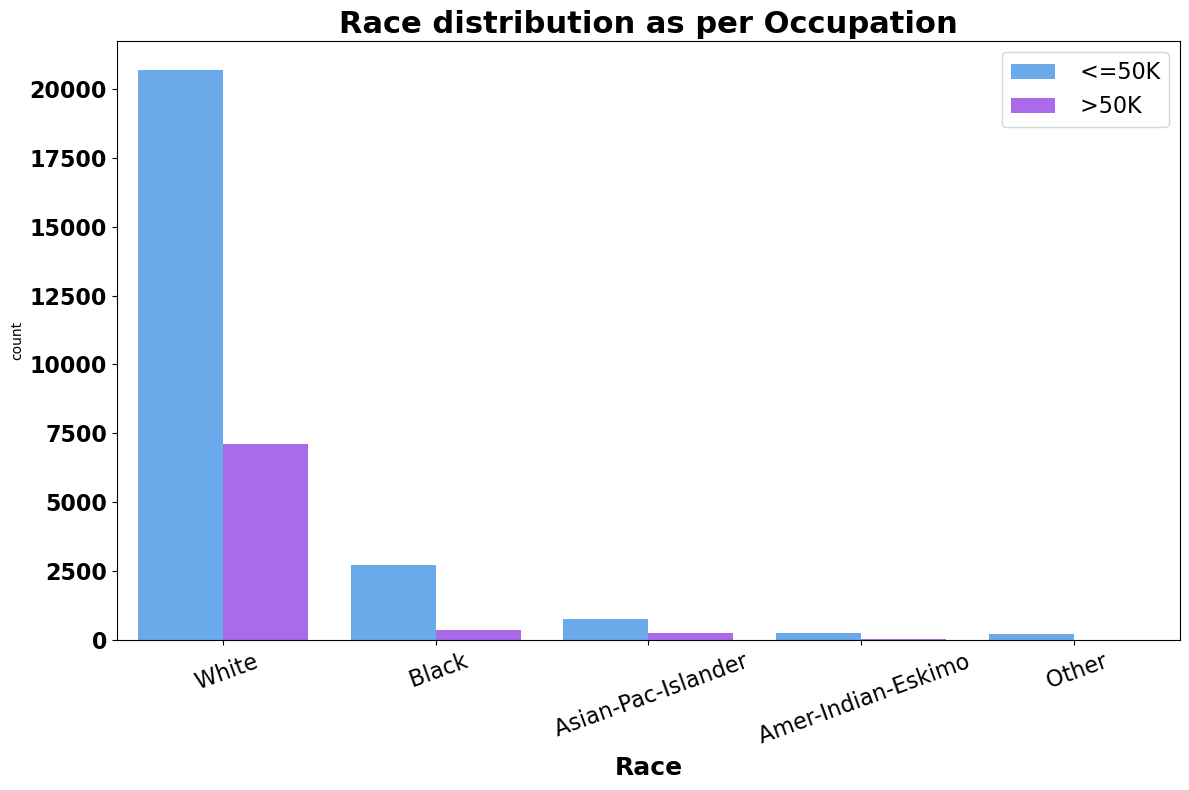

In [84]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Race'], hue=df['Income'], palette='cool')
plt.title('Race distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

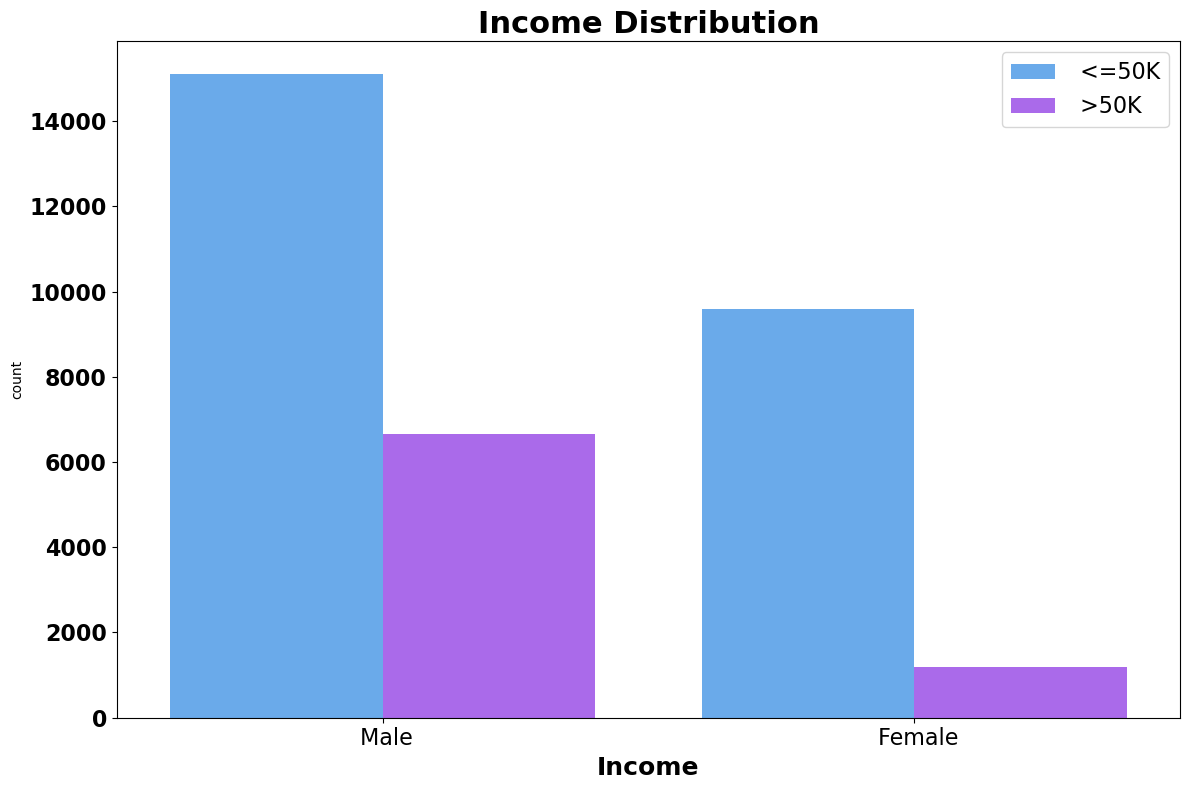

In [93]:
# sex vs income
plt.figure(figsize=(12,8))
p = sns.countplot(df['Sex'], hue=df['Income'], palette='cool')
plt.title('Income Distribution', fontsize=22, fontweight='bold')
p.set_xlabel('Income',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

### Observation:
Significant gap between male and female earnings.

In [98]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True).style.background_gradient(cmap='Pastel1')


### Observation 
Out of all population 33 % are womens. Inside that most of females work in Adm-clerical,Other-service,Prof-specialty.

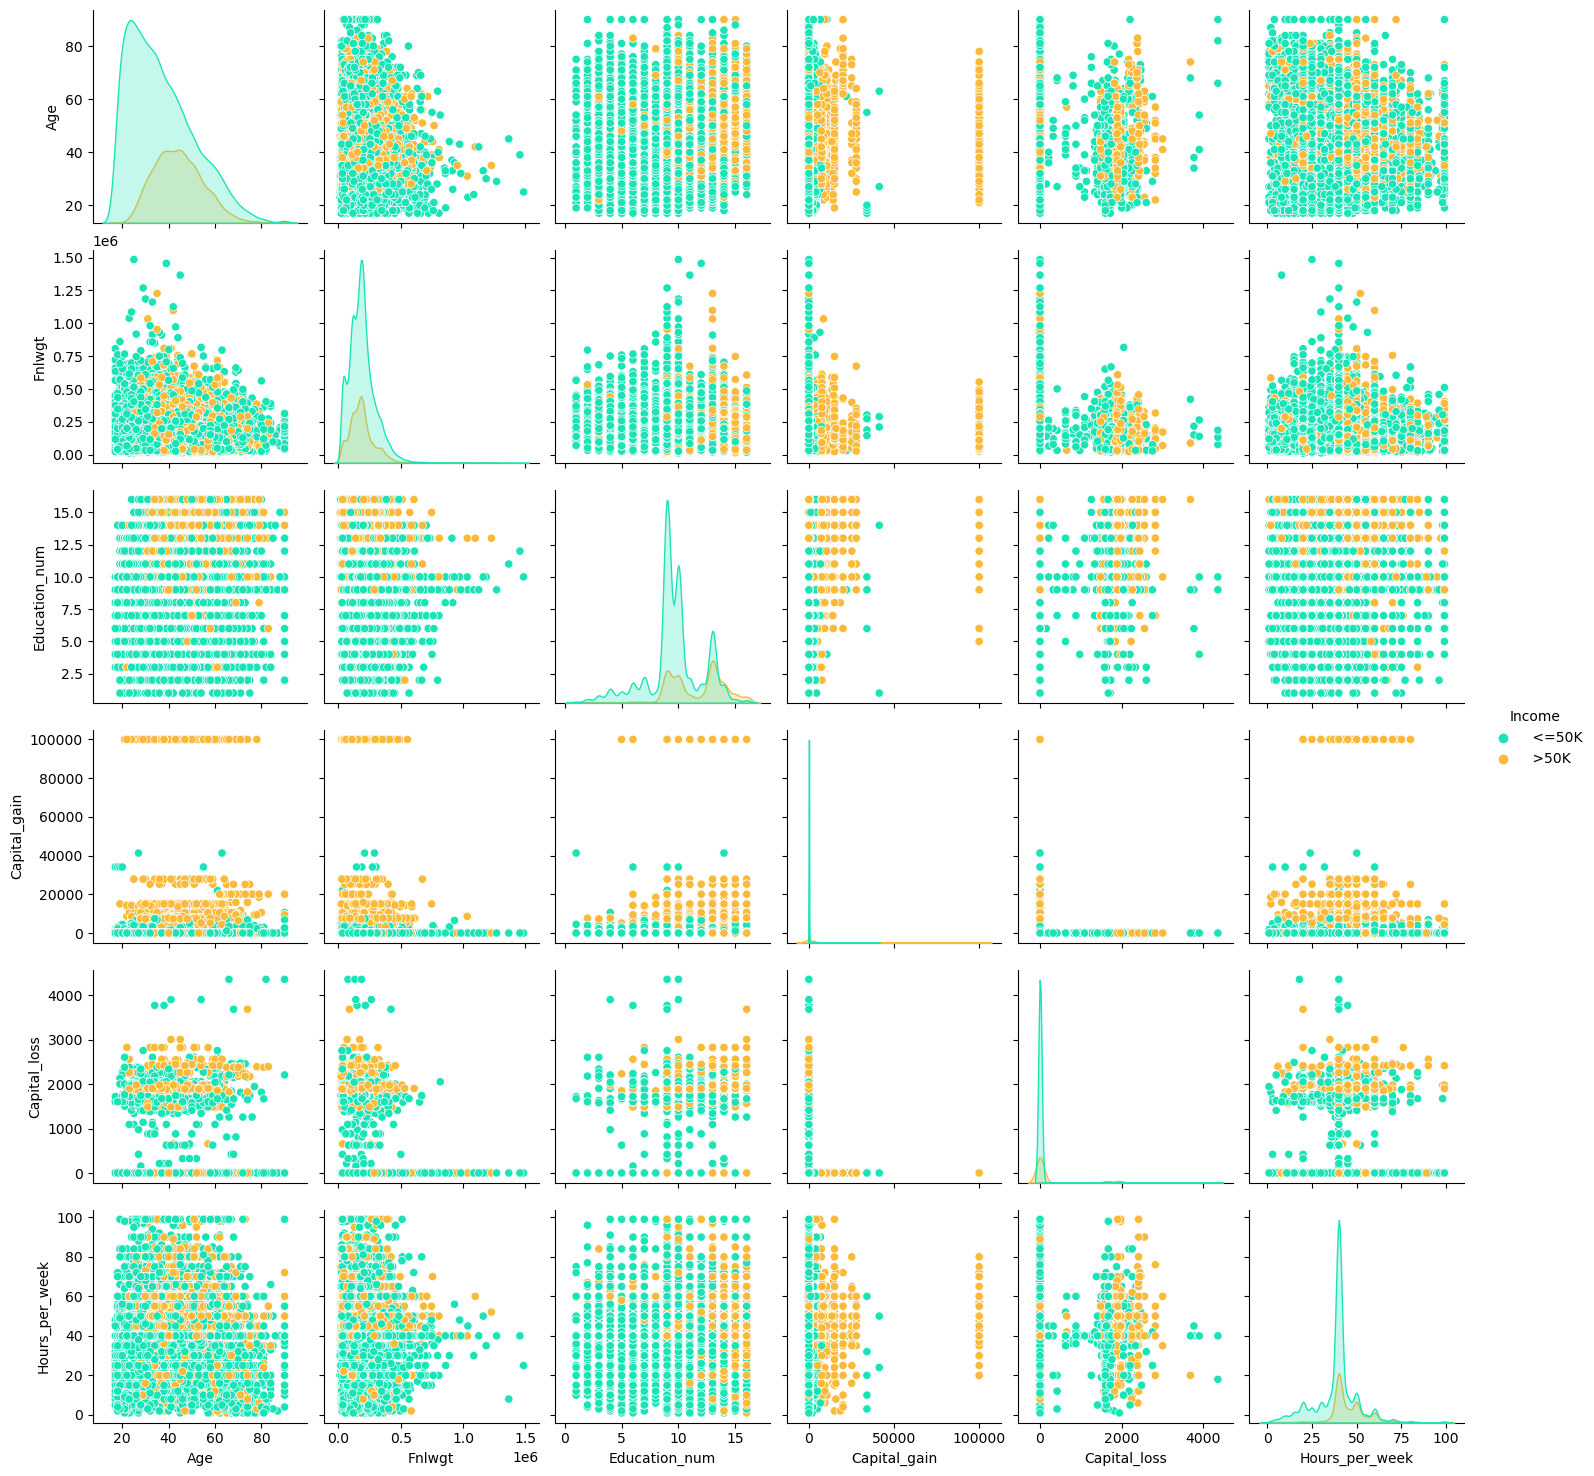

In [101]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="turbo")

In [102]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


## Encoding categorical data

In [103]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])

In [104]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0,41-50
6,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1,51-60
7,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1,31-40
8,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1,41-50
9,37,3,280464,15,10,2,3,0,2,1,0,0,80,38,1,31-40


In [111]:
df.drop('age_group',axis = 1, inplace = True)

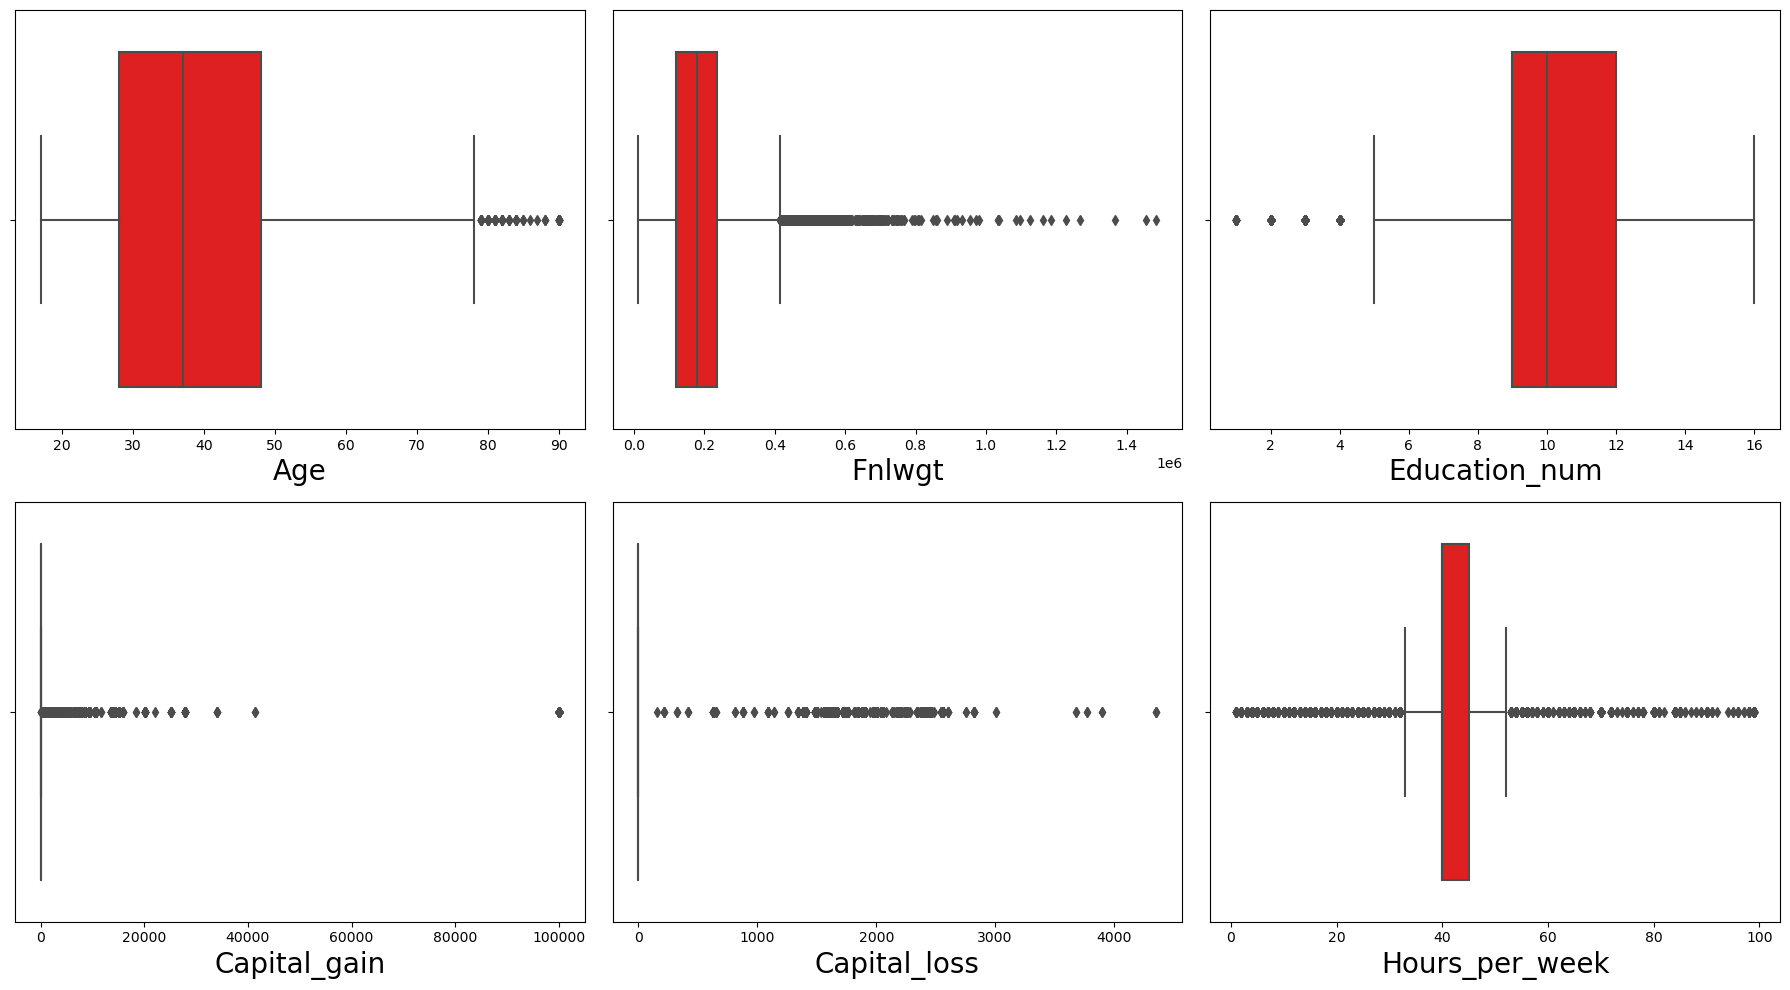

In [112]:
# Outliers Detection and Removal
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

WE can see outliers exists

### Outliers removal using Zscore method

In [114]:
# Droping unnecessary columns
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

In [115]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df2=df1.copy()

Shape of the dataframe before removing outliers:  (32536, 13)
Shape of the dataframe after removing outliers:  (28061, 13)
Percentage of data loss post outlier removal:  13.753995574133269


In [116]:
# Data Loss
print('Percentage Data Loss :',((32536-28061)/32536)*100,'%')

Percentage Data Loss : 13.753995574133269 %


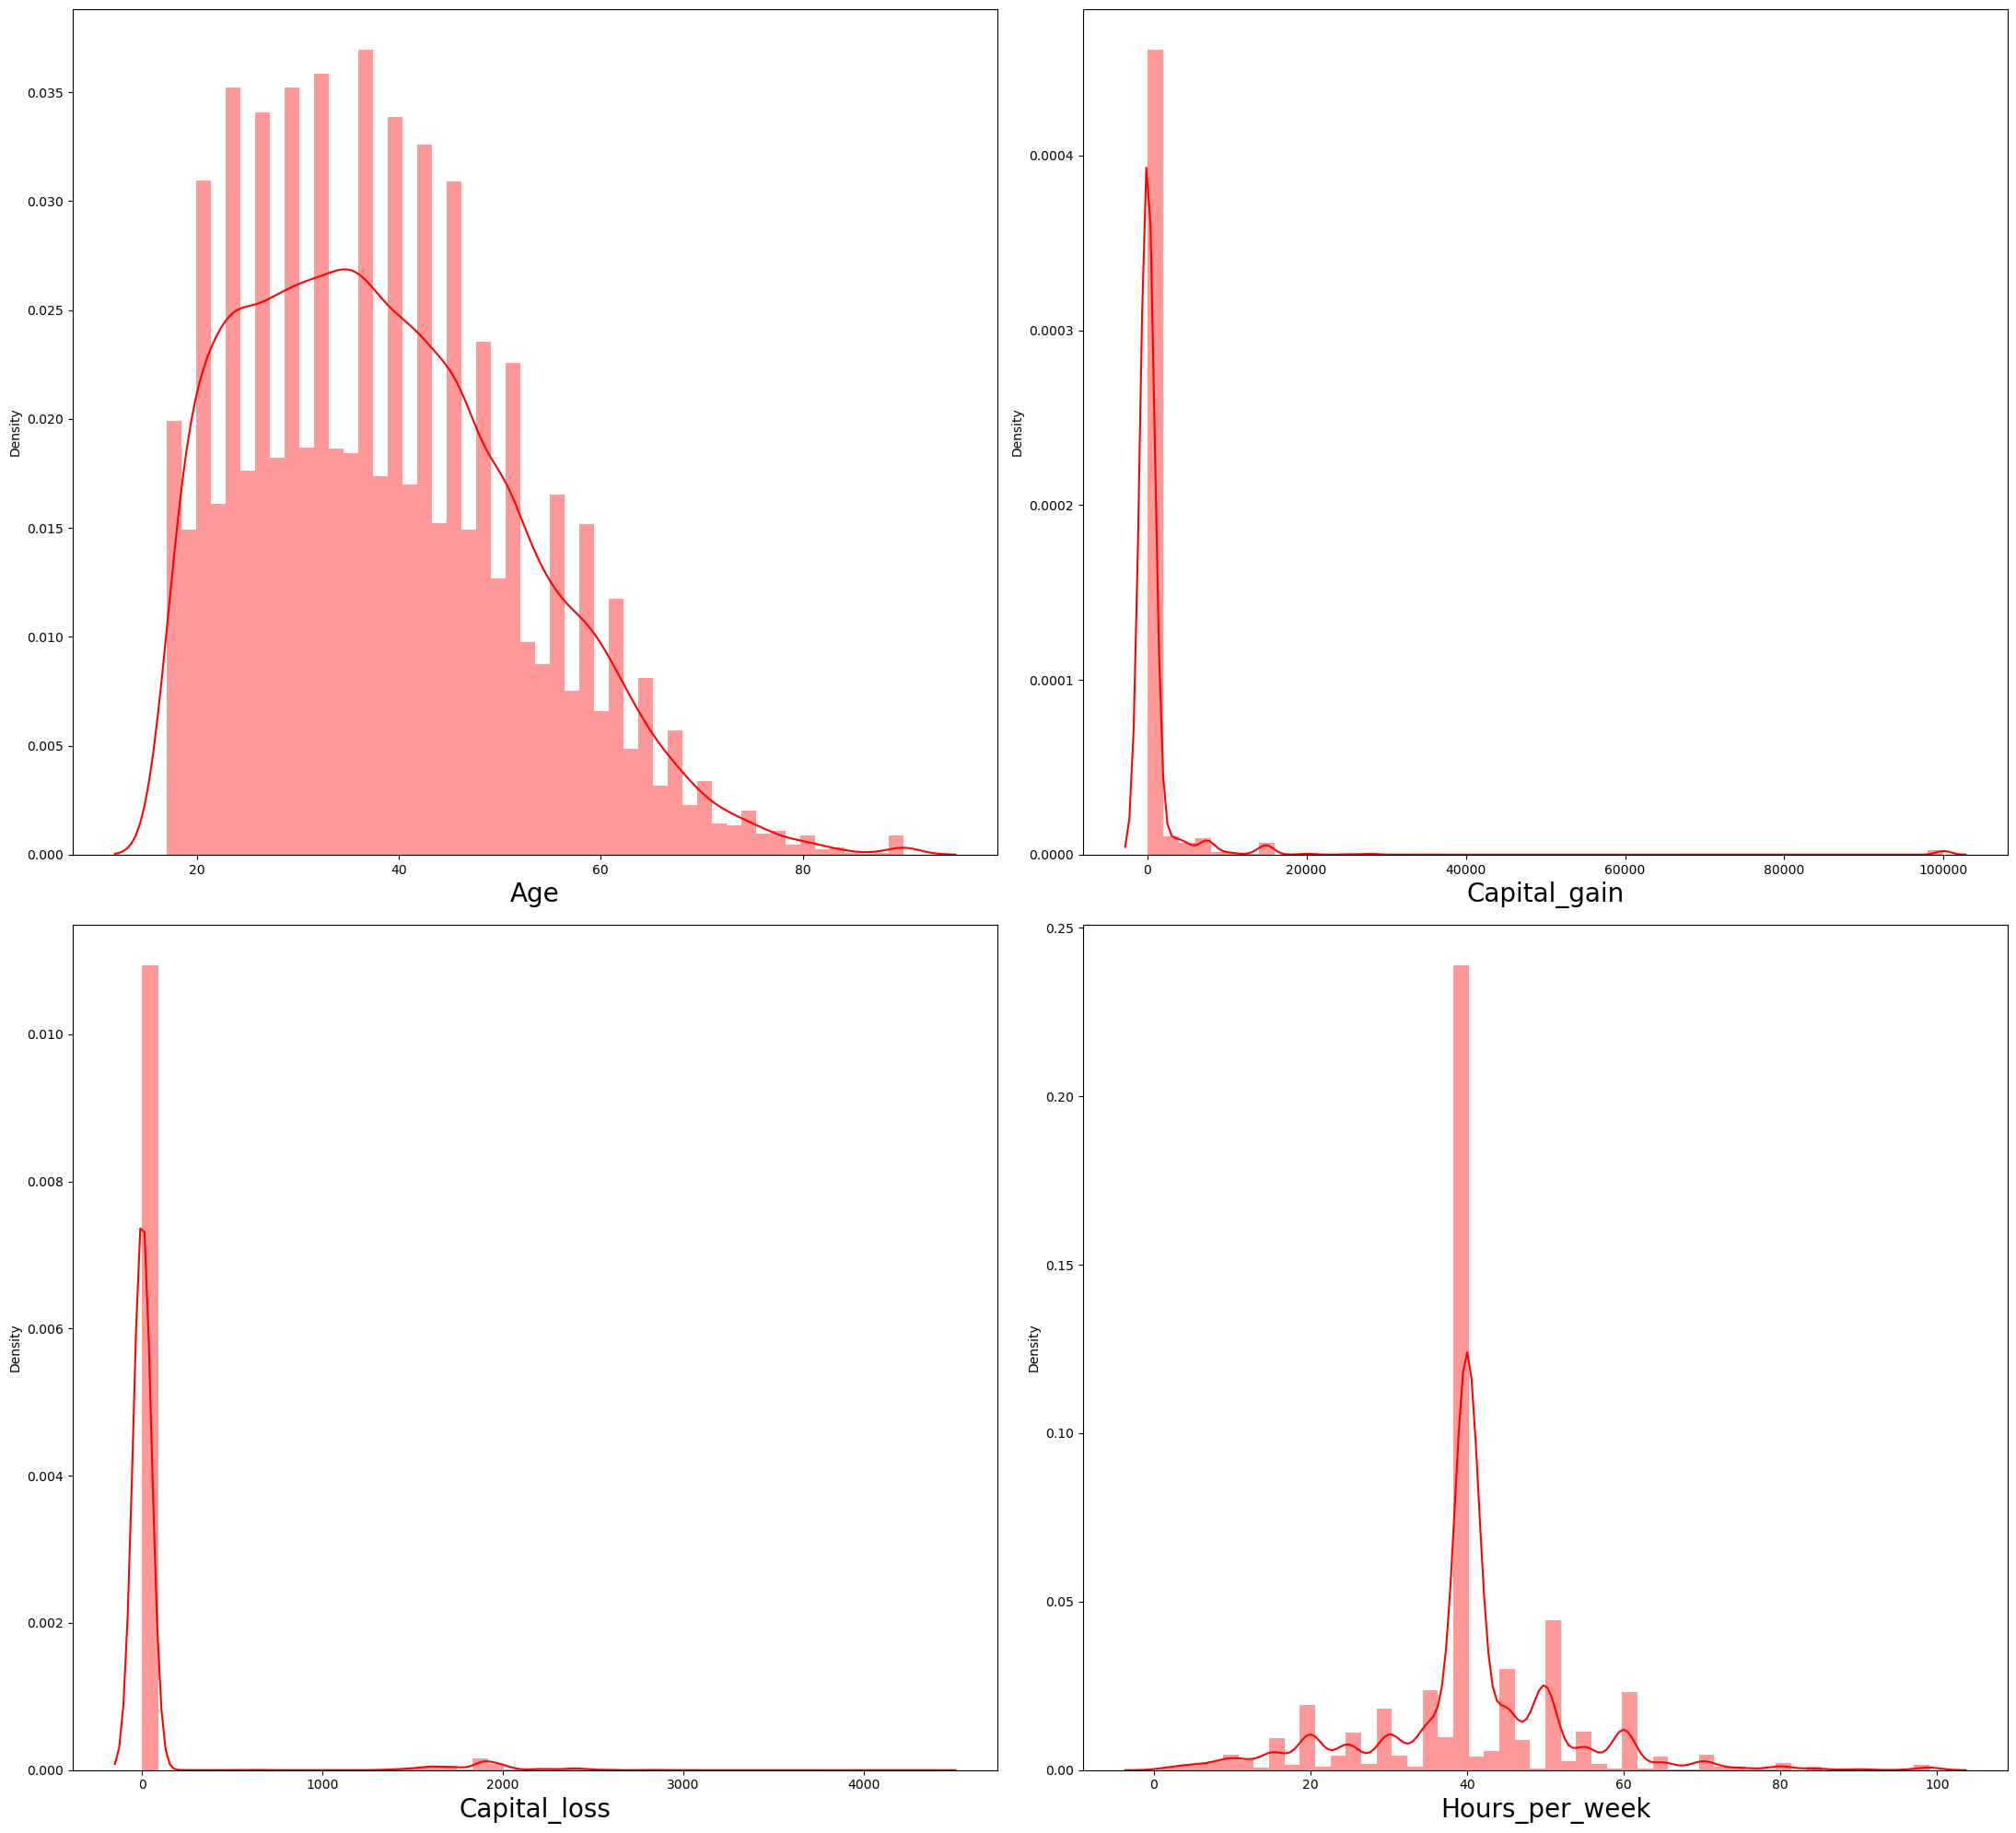

In [118]:
# Skewness of features
plt.figure(figsize=(22,20))
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [120]:
df2.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

### Observation :
1. Relationship,Sex,Native_country,Income are skewed but as they are categorical concept of skewness doesnot mean anything to it.
2. Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them.

In [121]:
# correlation 
df2.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.023459,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,-0.010613,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.007348,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.016396,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.004779,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,0.030105,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.000186,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,-0.027323,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,-0.009077,0.098705,0.019185,0.343487
Capital_loss,0.023459,-0.010613,0.007348,-0.016396,-0.004779,0.030105,0.000186,-0.027323,-0.009077,1.000000,-0.003440,0.002925,-0.016465


In [123]:
# Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
vif['Features']= df2.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


We need to scale the data and apply PCA

In [125]:
#Balanceing Imbalanced target feature
df2.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

In [126]:
# Balancing using SMOTE
from imblearn.over_sampling import SMOTE

In [127]:
# Splitting data in target and dependent feature
X = df2.drop(['Income'], axis =1)
Y = df2['Income']

In [128]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [129]:
Y.value_counts()

0    21767
1    21767
Name: Income, dtype: int64

### Standard Scaling


In [130]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

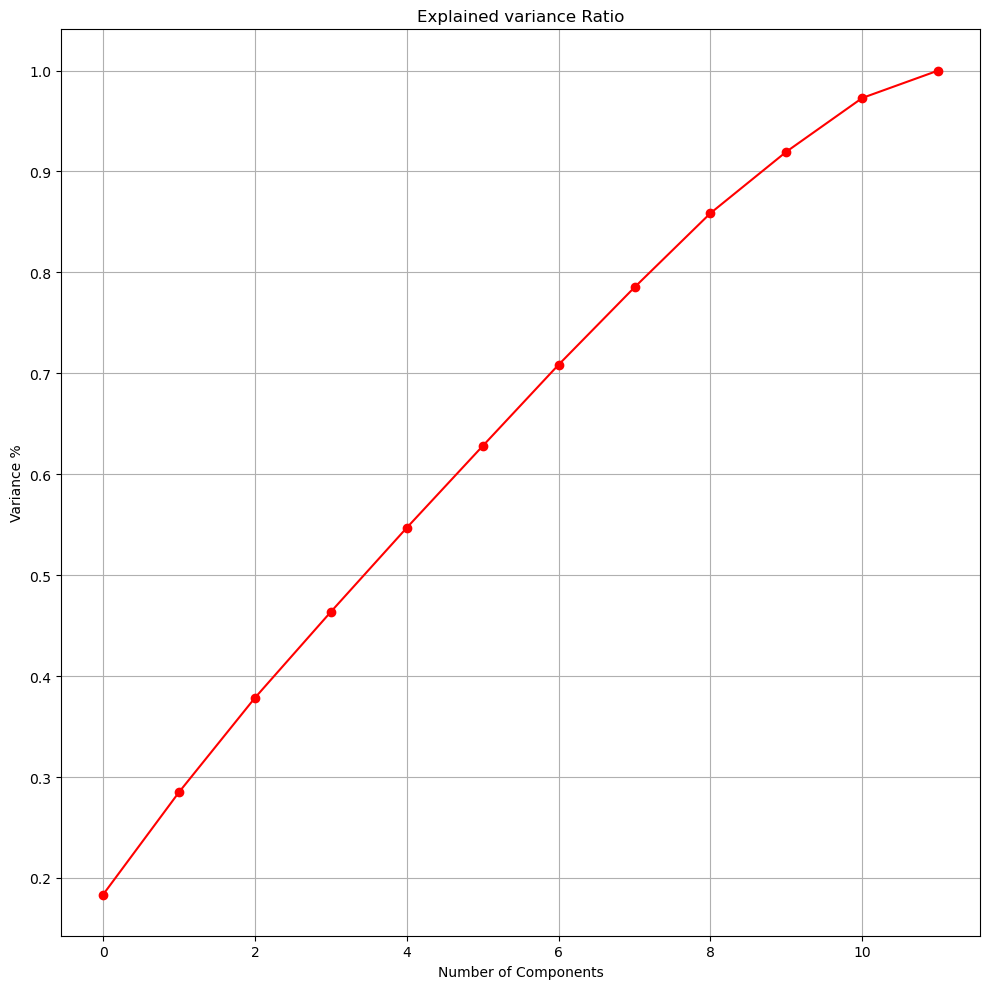

In [131]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

### Observation :
AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data. We shall pick the first 9 components for our prediction.

In [136]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [137]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

In [138]:
## Machine Learning Model Building

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30473, 9)
Training target vector size: (30473,)
Test feature matrix size: (13061, 9)
Test target vector size: (13061,)


In [142]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is')
    print('\n')
    print('Accuracy Score :', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report :',classification_report(Y_test, y_pred))
    print('\n')
    print("="*50)

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score : 0.7663272337493301


Confusion matrix : [[4923 1575]
 [1477 5086]]


Classification Report :               precision    recall  f1-score   support

           0       0.77      0.76      0.76      6498
           1       0.76      0.77      0.77      6563

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 0.8279611055815022


Confusion matrix : [[4920 1578]
 [ 669 5894]]


Classification Report :               precision    recall  f1-score   support

           0       0.88      0.76      0.81      6498
           1       0.79      0.90      0.84      6563

    accuracy                           0.83     13061
   macro avg       0.83      0.83      0.83     13061
weighted avg       0.83      0.83      0.83     13

In [ ]:
# CrossValidation :
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('='*50)

### Hyper Parameter Tuning : GridSearchCV

In [145]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [147]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.855 total time=   3.0s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.848 total time=   3.0s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.852 total time=   3.0s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.858 total time=   2.1s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

[CV 5/5; 8/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=150;, score=0.843 total time=   2.7s
[CV 1/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 1/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.852 total time=   3.6s
[CV 2/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 2/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.844 total time=   3.6s
[CV 3/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 3/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.845 total time=   3.6s
[CV 4/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 4/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.850 total time=   3.6s
[CV 5/5; 9/54] START criterion=gini, max_dep

[CV 4/5; 16/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.858 total time=   2.4s
[CV 5/5; 16/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100
[CV 5/5; 16/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.854 total time=   2.4s
[CV 1/5; 17/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150
[CV 1/5; 17/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.860 total time=   3.7s
[CV 2/5; 17/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150
[CV 2/5; 17/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.857 total time=   3.7s
[CV 3/5; 17/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150
[CV 3/5; 17/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.851 total time=   3.6s
[CV 4/5; 17/54] START criterion=gin

[CV 3/5; 24/54] END criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200;, score=0.852 total time=   5.9s
[CV 4/5; 24/54] START criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200
[CV 4/5; 24/54] END criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200;, score=0.858 total time=   5.8s
[CV 5/5; 24/54] START criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200
[CV 5/5; 24/54] END criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200;, score=0.856 total time=   5.7s
[CV 1/5; 25/54] START criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100
[CV 1/5; 25/54] END criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100;, score=0.859 total time=   2.5s
[CV 2/5; 25/54] START criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100
[CV 2/5; 25/54] END criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100;, score=0.854 total time=   2.5s
[CV 3/5; 25/54] START criterion=gin

[CV 2/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.846 total time=   3.1s
[CV 3/5; 32/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150
[CV 3/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.847 total time=   3.1s
[CV 4/5; 32/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150
[CV 4/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.852 total time=   3.0s
[CV 5/5; 32/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150
[CV 5/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.846 total time=   3.0s
[CV 1/5; 33/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=200
[CV 1/5; 33/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=200;, score=0.854 total time=   4.1s
[CV 2/5;

[CV 5/5; 39/54] END criterion=entropy, max_depth=30, min_samples_split=3, n_estimators=200;, score=0.855 total time=   6.1s
[CV 1/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 1/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.858 total time=   2.8s
[CV 2/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 2/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.855 total time=   2.8s
[CV 3/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 3/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.854 total time=   2.8s
[CV 4/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 4/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.858 total time=   2.8s
[CV 5/5;

[CV 3/5; 47/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150;, score=0.851 total time=   4.9s
[CV 4/5; 47/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150
[CV 4/5; 47/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150;, score=0.858 total time=   5.0s
[CV 5/5; 47/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150
[CV 5/5; 47/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150;, score=0.853 total time=   5.0s
[CV 1/5; 48/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200
[CV 1/5; 48/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200;, score=0.857 total time=   6.6s
[CV 2/5; 48/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200
[CV 2/5; 48/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200;, score=0.856 total time=   6.6s
[CV 3/5;

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [148]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 100}

### Final Model

In [149]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 100, max_depth=30 ,min_samples_split=3 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Accuracy Score : 0.8627210780185285


In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
y_pred_prob

array([0.3347864 , 0.40536972, 0.54843954, ..., 0.025     , 0.97302495,
       0.07747684])

In [157]:
fpr,tpr,threshold = roc_curve(Y_test,y_pred_prob)
print(fpr,tpr,threshold)

[0.         0.         0.         ... 0.84195137 0.84533703 1.        ] [0.         0.07664178 0.07740363 ... 0.99923815 0.99923815 1.        ] [           inf 1.00000000e+00 9.99750000e-01 ... 1.42857143e-04
 9.17431193e-05 0.00000000e+00]


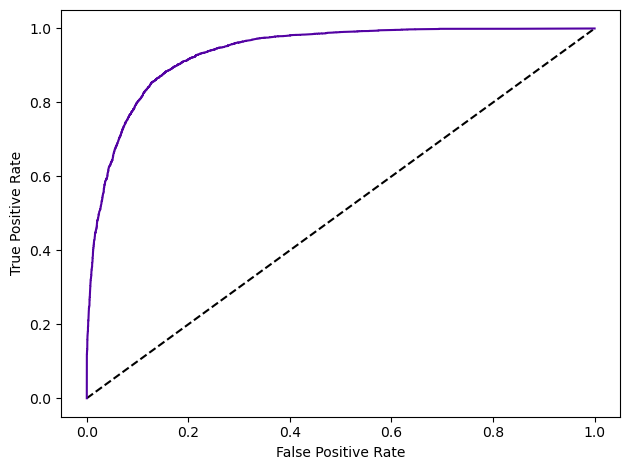

In [159]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = "ExtraTreesClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Saving model


In [160]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.obj')

['Census_Income_Final.obj']